## Create dataframes 

The underlying idea of a dataframe is based on 'spreadsheets'. In other words, dataframes store data in discrete rows and columns, where each column can be named (something that is not possible in Arrays but is possible in Series). There are also multiple columns in a dataframe (as opposed to Series, where there can be only one discrete indexed column).<br>
<br>
The constructor for a dataframe is <font color=red>pandas.DataFrame(data=None, index=None)</font> or if you are using 'pd' as an alias for pandas, then it would be <font color=red>pd.DataFrame(data=None, index=None)</font><br>
<br>
Let us have a look at the following example.

In [1]:
import pandas as pd
import numpy as np

# A dataframe has a row and a column index

my_portfolio = {
    "stock_name": ["Alphabet", "Facebook", "Apple", "Tesla", "Infosys"],
    "quantity_owned": [1564, 6546, 5464, 6513, 4155],
    "average_buy_price": ["$950", "$160", "$120", "$270", "$15"]
}

# We have passed the 'data' argument in the dataframe constructor
my_portfolio_frame = pd.DataFrame(my_portfolio)

my_portfolio_frame  # This is a dataframe

,stock_name,quantity_owned,average_buy_price
0,Alphabet,1564,$950
1,Facebook,6546,$160
2,Apple,5464,$120
3,Tesla,6513,$270
4,Infosys,4155,$15


## Customize index of the dataframe 

In the above output, you can see that the 'index' is the default one which starts from 0. One can customize this index.

In [2]:
ordinals = ["first", "second", "third", "fourth", "fifth"]  # list

# Please notice that we have not kept index as default i.e.'none'
my_portfolio_frame = pd.DataFrame(my_portfolio, index=ordinals)

my_portfolio_frame

,stock_name,quantity_owned,average_buy_price
first,Alphabet,1564,$950
second,Facebook,6546,$160
third,Apple,5464,$120
fourth,Tesla,6513,$270
fifth,Infosys,4155,$15


## Rearrange the columns in a dataframe 

We can also define or change the order of columns.

In [3]:
# you can define the order of columns using the parameter columns=[] in the construction statement

my_portfolio_frame = pd.DataFrame(my_portfolio, columns=[
                                  "stock_name", "quantity_owned", "average_buy_price"], index=ordinals)

my_portfolio_frame

,stock_name,quantity_owned,average_buy_price
first,Alphabet,1564,$950
second,Facebook,6546,$160
third,Apple,5464,$120
fourth,Tesla,6513,$270
fifth,Infosys,4155,$15


## Use an existing column as an index of a dataframe

We will use the column 'stock_name' as the index of the dataframe.

In [4]:
my_portfolio_frame = pd.DataFrame(my_portfolio,
                                  columns=["quantity_owned",
                                           "average_buy_price"],
                                  index=my_portfolio["stock_name"])

my_portfolio_frame

,quantity_owned,average_buy_price
Alphabet,1564,$950
Facebook,6546,$160
Apple,5464,$120
Tesla,6513,$270
Infosys,4155,$15


## Access a column in a dataframe 

You can access or retrieve a single or multiple columns by their names or by their location. 

In [5]:
# The index at present is the 'stock_name'. Refer to the above code.

# This makes sense if we just want to know the quantity of stock that we own for each stock (which is our index, currently)

# Column name is passed within quotes within square brackets
print(my_portfolio_frame["quantity_owned"])

Alphabet    1564
Facebook    6546
Apple       5464
Tesla       6513
Infosys     4155
Name: quantity_owned, dtype: int64


## Load financial market data

This is a recap from the section 'Importing Data and Data Visualisation'. We have done this in a <b>pd.read_csv()</b> iPython notebook.

In [8]:
# Loading data using CSV file
import numpy as np
import pandas as pd

infy = pd.read_csv('Quote-Equity-INFY-EQ-17-05-2021-to-17-06-2021.csv')

In [9]:
infy.head()  # You will see the top 5 rows

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,16-Jun-2021,EQ,"1,472.70","1,489.45","1,467.50","1,473.90","1,479.20","1,480.60","1,478.45","1,489.45",685.25,7661710,"11,327,444,062.60",162924
1,15-Jun-2021,EQ,"1,464.00","1,476.00","1,463.00","1,461.80","1,474.00","1,473.90","1,469.83","1,477.55",685.25,5403104,"7,941,636,318.20",141422
2,14-Jun-2021,EQ,"1,471.00","1,477.00","1,453.45","1,446.90","1,460.00","1,461.80","1,463.12","1,477.55",685.25,7132294,"10,435,431,661.00",147667
3,11-Jun-2021,EQ,"1,430.10","1,451.60","1,429.45","1,424.30","1,446.05","1,446.90","1,443.02","1,477.55",675.50,6140828,"8,861,316,923.80",173378
4,10-Jun-2021,EQ,"1,424.00","1,429.00","1,419.00","1,415.30","1,424.25","1,424.30","1,423.55","1,477.55",675.50,3496575,"4,977,561,087.00",121283


## Dropping rows and/or columns 

In the above Infosys stock data, it is not necessary that you need all the columns which are present in the .csv file. Hence, to make your dataframe more understandable, you may drop the columns that you do not need using drop function.<br>
<br>
General Syntax for dropping columns:<br>
<pre>DataFrame.drop(['Column_name'])</pre>
General Syntax for dropping rows:<br>
<pre>DataFrame.drop(DataFrame.index[[x,y,z...]]</pre>
where x,y,z are row index values

In [11]:
# The axis=1 represents that we are considering columns while dropping.

infy_new = infy.drop(['OPEN '], axis=1)

infy_new.head()

,Date,series,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,16-Jun-2021,EQ,"1,489.45","1,467.50","1,473.90","1,479.20","1,480.60","1,478.45","1,489.45",685.25,7661710,"11,327,444,062.60",162924
1,15-Jun-2021,EQ,"1,476.00","1,463.00","1,461.80","1,474.00","1,473.90","1,469.83","1,477.55",685.25,5403104,"7,941,636,318.20",141422
2,14-Jun-2021,EQ,"1,477.00","1,453.45","1,446.90","1,460.00","1,461.80","1,463.12","1,477.55",685.25,7132294,"10,435,431,661.00",147667
3,11-Jun-2021,EQ,"1,451.60","1,429.45","1,424.30","1,446.05","1,446.90","1,443.02","1,477.55",675.50,6140828,"8,861,316,923.80",173378
4,10-Jun-2021,EQ,"1,429.00","1,419.00","1,415.30","1,424.25","1,424.30","1,423.55","1,477.55",675.50,3496575,"4,977,561,087.00",121283


In [12]:
# Drop 3rd and 4th rows from infy_new dataframe. 
# Here, we are removing multiple rows at once. Therefore double bracket is used on the index. 

infy_new.drop(infy_new.index[[3, 4]]).head()

,Date,series,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,16-Jun-2021,EQ,"1,489.45","1,467.50","1,473.90","1,479.20","1,480.60","1,478.45","1,489.45",685.25,7661710,"11,327,444,062.60",162924
1,15-Jun-2021,EQ,"1,476.00","1,463.00","1,461.80","1,474.00","1,473.90","1,469.83","1,477.55",685.25,5403104,"7,941,636,318.20",141422
2,14-Jun-2021,EQ,"1,477.00","1,453.45","1,446.90","1,460.00","1,461.80","1,463.12","1,477.55",685.25,7132294,"10,435,431,661.00",147667
5,09-Jun-2021,EQ,"1,425.00","1,404.60","1,412.95","1,415.00","1,415.30","1,415.72","1,477.55",675.50,5394317,"7,636,846,520.45",137139
6,08-Jun-2021,EQ,"1,421.75","1,395.55","1,389.65","1,414.00","1,412.95","1,412.47","1,477.55",675.50,7360630,"10,396,698,470.40",188069


## Sort a dataframe using a column 

Sometimes it becomes necessary to sort a stock price dataframe, based on the 'Closing Price'.

In [15]:
# Sorting dataframe in descending order

infy_new = infy_new.sort_values(by="close ", ascending=False)

# Prints top 20 values of closing prices in the given dataset
print(infy_new.head(20))

          Date  series      HIGH       LOW  PREV. CLOSE       ltp     close   \
0   16-Jun-2021      EQ  1,489.45  1,467.50     1,473.90  1,479.20  1,480.60   
1   15-Jun-2021      EQ  1,476.00  1,463.00     1,461.80  1,474.00  1,473.90   
2   14-Jun-2021      EQ  1,477.00  1,453.45     1,446.90  1,460.00  1,461.80   
3   11-Jun-2021      EQ  1,451.60  1,429.45     1,424.30  1,446.05  1,446.90   
4   10-Jun-2021      EQ  1,429.00  1,419.00     1,415.30  1,424.25  1,424.30   
5   09-Jun-2021      EQ  1,425.00  1,404.60     1,412.95  1,415.00  1,415.30   
6   08-Jun-2021      EQ  1,421.75  1,395.55     1,389.65  1,414.00  1,412.95   
13  28-May-2021      EQ  1,414.00  1,396.10     1,402.25  1,407.70  1,405.05   
14  27-May-2021      EQ  1,416.25  1,391.70     1,397.25  1,408.90  1,402.25   
15  26-May-2021      EQ  1,400.00  1,362.05     1,361.60  1,395.00  1,397.25   
12  31-May-2021      EQ  1,401.50  1,383.00     1,405.05  1,395.00  1,393.75   
7   07-Jun-2021      EQ  1,392.00  1,377

In [16]:
# Create a customized dataframe with random numbers between 50k to 120k.
import numpy as np
names = ['Jay', 'Varun', 'Devang', 'Ishan', 'Vibhu']

months = ["January", "February", "March",
          "April", "May", "June",
          "July", "August", "September",
          "October", "November", "December"]

df = pd.DataFrame(np.random.randn(12, 5)*10000, columns=names, index=months)

df

,Jay,Varun,Devang,Ishan,Vibhu
January,13582.628704,-21187.743329,7140.470222,12403.802969,184.768798
February,-7133.313703,-355.003638,-724.159190,7633.956682,-6832.799468
March,1295.116410,-11895.140316,-15563.680647,6982.134306,2527.174651
April,11008.797061,11102.246375,-796.571013,-11016.528712,12167.300640
May,13423.465375,-3587.678991,-38.352086,12537.532471,13575.078780
June,-14146.337237,11361.459604,-5549.599375,-10241.292325,4337.838971
July,-1097.776665,-12746.362824,2591.659951,18885.502505,-17783.561539
August,5471.719945,-7600.978190,-7529.374370,5269.963788,9310.554918
September,5001.253941,4335.955388,5217.870828,-3368.329212,13361.455424
October,-9076.552469,3964.759715,-2939.116165,20372.082392,-3955.144981


In the upcoming Jupyter Notebook, we will understand Descriptive Statistical Functions on a dataframe but before that a few quiz questions and exercises on this.

## Data preparation 

In [17]:
# Loading and viewing data
import numpy as np
import pandas as pd

infy = pd.read_csv('Quote-Equity-INFY-EQ-17-05-2021-to-17-06-2021.csv')

Once you import or load your OHLC data in a dataframe, it is a good habit to print the the 'head' and 'tail' of that dataframe.

In [18]:
infy.head()  # Printing the first five rows of your dataframe

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,16-Jun-2021,EQ,"1,472.70","1,489.45","1,467.50","1,473.90","1,479.20","1,480.60","1,478.45","1,489.45",685.25,7661710,"11,327,444,062.60",162924
1,15-Jun-2021,EQ,"1,464.00","1,476.00","1,463.00","1,461.80","1,474.00","1,473.90","1,469.83","1,477.55",685.25,5403104,"7,941,636,318.20",141422
2,14-Jun-2021,EQ,"1,471.00","1,477.00","1,453.45","1,446.90","1,460.00","1,461.80","1,463.12","1,477.55",685.25,7132294,"10,435,431,661.00",147667
3,11-Jun-2021,EQ,"1,430.10","1,451.60","1,429.45","1,424.30","1,446.05","1,446.90","1,443.02","1,477.55",675.50,6140828,"8,861,316,923.80",173378
4,10-Jun-2021,EQ,"1,424.00","1,429.00","1,419.00","1,415.30","1,424.25","1,424.30","1,423.55","1,477.55",675.50,3496575,"4,977,561,087.00",121283


In [19]:
infy.tail()  # Printing the last five rows of your dataframe

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
18,21-May-2021,EQ,"1,347.50","1,357.50","1,346.35","1,339.30","1,356.00","1,354.50","1,351.75","1,477.55",653.0,4969733,"6,717,856,342.70",153186
19,20-May-2021,EQ,"1,348.40","1,349.10","1,335.00","1,337.00","1,341.95","1,339.30","1,340.80","1,477.55",653.0,4490092,"6,020,330,291.35",111007
20,19-May-2021,EQ,"1,342.00","1,357.45","1,333.25","1,340.00","1,334.65","1,337.00","1,344.41","1,477.55",653.0,4435878,"5,963,617,809.65",135009
21,18-May-2021,EQ,"1,338.00","1,344.60","1,329.50","1,329.40","1,338.75","1,340.00","1,338.06","1,477.55",653.0,5620150,"7,520,081,253.15",135851
22,17-May-2021,EQ,"1,320.30","1,334.95","1,320.30","1,316.40","1,328.55","1,329.40","1,329.34","1,477.55",653.0,5017129,"6,669,458,544.35",118670


### DataFrame.count()

This method returns the number of non-null observations over the requested observations.

In [20]:
print(infy.count())

Date             23
series           23
OPEN             23
HIGH             23
LOW              23
PREV. CLOSE      23
ltp              23
close            23
vwap             23
52W H            23
52W L            23
VOLUME           23
VALUE            23
No of trades     23
dtype: int64


In [21]:
print(infy["PREV. CLOSE "].count())

23


In [22]:
print(infy["PREV. CLOSE "].min())

1,316.40


In [23]:
print(infy.min())

Date                   01-Jun-2021
series                          EQ
OPEN                      1,320.30
HIGH                      1,334.95
LOW                       1,320.30
PREV. CLOSE               1,316.40
ltp                       1,328.55
close                     1,329.40
vwap                      1,329.34
52W H                     1,477.55
52W L                          653
VOLUME                     3496575
VALUE            10,396,698,470.40
No of trades                106771
dtype: object


In [24]:
print(infy["PREV. CLOSE "].max())

1,473.90


### DataFrame.mean()

This method returns the mean of the requested observations.

In [29]:
print(infy["VOLUME "].mean())

5864431.826086956


In [30]:
print(infy["VOLUME "].median())

5115645.0


### DataFrame.mode()

This method returns the mode of the requested observations.

In [32]:
# The "Close Price" series of infosys stock is multi-modal
print(infy["VOLUME "].mode())

0      3496575
1      4099340
2      4194328
3      4225371
4      4261312
5      4429904
6      4435878
7      4490092
8      4791325
9      4969733
10     5017129
11     5115645
12     5154576
13     5394317
14     5403104
15     5620150
16     6140828
17     6850024
18     7132294
19     7360630
20     7661710
21     9272276
22    15365391
dtype: int64


### DataFrame.sum()

This method returns the sum of all the values of the requested observations.

In [34]:
# If someone just wants to know the sheer amount of Infosys stocks traded over 2 years
print(infy["VOLUME "].sum())

134881932


### DataFrame.diff()

This method returns the 'difference' between the current observation and the previous observation.

Этот метод возвращает "разницу" между текущим наблюдением и предыдущим наблюдением.

In [35]:
print(infy["VOLUME "].diff())

0            NaN
1     -2258606.0
2      1729190.0
3      -991466.0
4     -2644253.0
5      1897742.0
6      1966313.0
7     -2206054.0
8      -960248.0
9       921317.0
10     4156631.0
11    -4480951.0
12     -361421.0
13     -168592.0
14    11104079.0
15    -8515367.0
16    -2750684.0
17      126031.0
18      744362.0
19     -479641.0
20      -54214.0
21     1184272.0
22     -603021.0
Name: VOLUME , dtype: float64


### DataFrame.pct_change()]

This method returns the percentage change of the current observation with the previous observation.

Этот метод возвращает процентное изменение текущего наблюдения по сравнению с предыдущим наблюдением.

In [37]:
print(infy["VOLUME "].pct_change())

0          NaN
1    -0.294791
2     0.320036
3    -0.139011
4    -0.430602
5     0.542743
6     0.364516
7    -0.299710
8    -0.186290
9     0.219658
10    0.812533
11   -0.483263
12   -0.075432
13   -0.038058
14    2.605789
15   -0.554191
16   -0.401558
17    0.030744
18    0.176165
19   -0.096512
20   -0.012074
21    0.266976
22   -0.107296
Name: VOLUME , dtype: float64


Visualising this give us a generic inference about the daily price fluctuation in the closing price of Infosys stock.

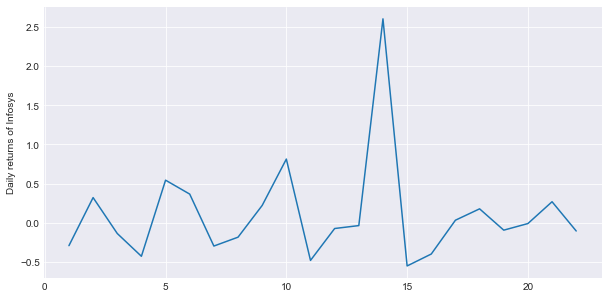

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')  # a package for better visualisation

plt.figure(figsize=(10, 5))
plt.ylabel('Daily returns of Infosys')
infy["VOLUME "].pct_change().plot()
plt.show()

### DataFrame.var()

This method returns the variance of the requested observations.

Этот метод возвращает дисперсию запрошенных наблюдений.

In [41]:
print(infy["VOLUME "].var())

6226784364194.331


### DataFrame.std()

This method returns the standard deviation of the requested observations.

In [43]:
print(infy["VOLUME "].std())

2495352.553086303


### DataFrame.rolling(window=).mean()

This method helps us to calculate the moving average of the observations.

Этот метод помогает нам рассчитать скользящую среднюю наблюдений.

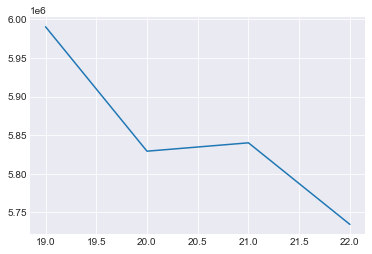

In [45]:
# The moving average window is 20 in this case
infy['VOLUME '].rolling(window=20).mean().plot()

A moving average of the close price with window = 20, smoothens the closing price data. You may have a look at it. We have plotted the daily Closing Price of Infosys and Moving Average (window = 20) of the daily Closing Price of Infosys against time.

Скользящая средняя цены закрытия с window = 20 сглаживает данные о цене закрытия. Вы можете взглянуть на него. Мы построили график дневной цены закрытия Infosys и скользящей средней (окно = 20) дневной цены закрытия Infosys по времени.

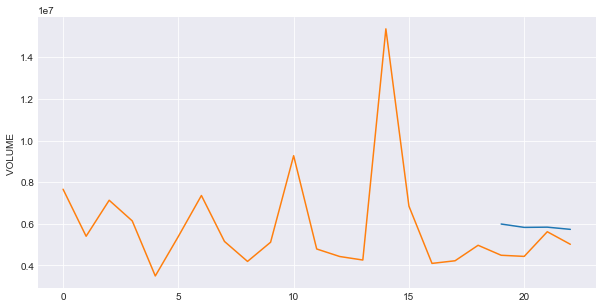

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 5))
plt.ylabel('VOLUME ')

# for another pandas version
infy["VOLUME "].rolling(window=20).mean().plot()
#pd.rolling_mean(infy["Close Price"],20).plot()

infy["VOLUME "].plot()
plt.show()

### DataFrame.expanding(min_periods=).mean()

This method returns the 'expanding' mean of the requested observations.

A common alternative to rolling mean is to use an expanding window mean, which returns the value of the mean with <b>all the observations avaliable up to that point in time.</b>

In [48]:
print(infy["VOLUME "].expanding(min_periods=20).mean())

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19    5.990439e+06
20    5.916412e+06
21    5.902946e+06
22    5.864432e+06
Name: VOLUME , dtype: float64


You may visualise expanding mean with the below code.

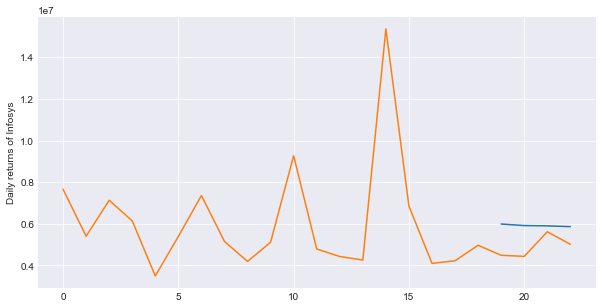

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 5))
plt.ylabel('Daily returns of Infosys')

infy["VOLUME "].expanding(min_periods=20).mean().plot()
infy["VOLUME "].plot()
plt.show()

Let us import another stock's data. We have saved the TCS (Tata Consultancy Services) data in our local machine as '../data_modules/tcs.csv'.

In [53]:
import numpy as np
import pandas as pd

tcs = pd.read_csv ('../data_modules/tcs.csv')

tcs.head()

FileNotFoundError: [Errno 2] File ../data_modules/tcs.csv does not exist: '../data_modules/tcs.csv'

### DataFrame.cov()

This method returns the covariance between the closing price of the Infosys stock with the closing price of the TCS stock. 

Этот метод возвращает ковариацию между ценой закрытия акций Infosys и ценой закрытия акций TCS.

In [ ]:
print(infy["Close Price"].cov(tcs["Close Price"]))

### DataFrame.corr()

This method returns the correlation between the closing price of the infosys stock with the closing price of the TCS stock.

Этот метод возвращает корреляцию между ценой закрытия акций infosys и ценой закрытия акций TCS.

In [ ]:
print(infy["Close Price"].corr(tcs["Close Price"]))

A correlation of 0.53 indicates a quite strong correlation between these two stocks.

__Корреляция 0,53 указывает на довольно сильную корреляцию между этими двумя акциями.__

### DataFrame.kurt()

This method returns unbiased kurtosis over the requested data set using Fisher's definition of kurtosis (where kurtosis of normal distribution = 0).

Этот метод возвращает несмещенный эксцесс по запрошенному набору данных, используя определение эксцесса Фишера (где эксцесс нормального распределения = 0).

In [ ]:
print(tcs["Close Price"].kurt())

A positive kurtosis value indicates a leptokurtic distribution.

Положительное значение эксцесса указывает на распределение лептокуртиков.

### DataFrame.skew()

This method unbiased skew over the requested data set.


__Этот метод непредвзято искажает запрошенный набор данных.__

In [ ]:
print(tcs["Close Price"].skew())

The distribution is positively skewed.
__(Распределение положительно искажено.)__

In [ ]:
print(infy["Close Price"].skew())

The distribution is positively skewed. However, TCS' distribution is more positively skewed than Infosys' distribution.
__Распределение положительно искажено. Однако распределение TCS более положительно искажено, чем распределение Infosys.__



Let us visualise both the distributions and see whether the above said sentences make sense or not.
__Давайте визуализируем оба распределения и посмотрим, имеют ли смысл вышеприведенные предложения или нет.__


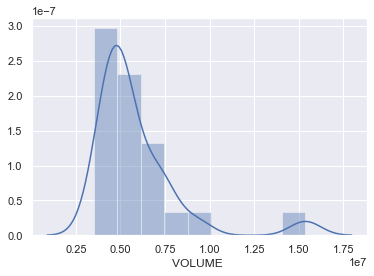

In [56]:
# Infosys distribution

import seaborn as sns

sns.set(color_codes=True)

sns.distplot(infy["VOLUME "])
plt.show()

In the above diagram, you can see why the infosys close price distribution is platykurtic and positively skewed.

__На приведенной выше диаграмме вы можете видеть, почему распределение цен закрытия infosys является платикуртическим и положительно искаженным.__

In [58]:
# TCS distribution

import seaborn as sns

sns.set(color_codes=True)

sns.distplot(tcs["Close Price"])
plt.show()

NameError: name 'tcs' is not defined

In the above diagram, you can see why the TCS close price distribution is leptokurtic and positively skewed.

__На приведенной выше диаграмме вы можете видеть, почему распределение цен закрытия TCS является лептокуртичным и положительно искаженным.__

A trained eye is statistics, will be able to see that the TCS stock's closing prices are more positively skewed than the Infosys stock's closing prices.

__Опытный глаз-это статистика, он сможет увидеть, что цены закрытия акций TCS более позитивно искажены, чем цены закрытия акций Infosys.__

In the upcoming Jupyter Notebook, we will continue understanding about Indexing and Missing Values in Pandas. But before that let us solve some Quiz Questions and Exercises.

__В предстоящем блокноте Jupyter мы продолжим разбираться в индексации и пропущенных значениях в Pandas. Но перед этим давайте решим несколько вопросов викторины и упражнений.__



In [ ]:
# Loading and Viewing data

import numpy as np
import pandas as pd

infy = pd.read_csv('../data_modules/infy_twoweeks.csv')

## Indexing

Indexing provides us with the axis labelling information in pandas. Further, it helps us to identify the exact position of data which is important while analysing data. <br>

While studying indexing, we will also focus on how to slice and dice the data according to our needs in a dataframe.

Индексация предоставляет нам информацию о маркировке оси в панд. Кроме того, это помогает нам определить точное положение данных, что важно при анализе данных. <br>

Изучая индексацию, мы также сосредоточимся на том, как нарезать данные в соответствии с нашими потребностями в фрейме данных.

## Indexing using .loc()

It is a 'label-location' based indexer for selection of data points.

Это индексатор на основе "расположения меток" для выбора точек данных.

In [ ]:
# Import the pandas library and aliasing as pd
import pandas as pd
import numpy as np

# Select all rows for a specific column

print(infy.loc[:, 'Close Price'])

In [ ]:
# Select all the rows of these specific columns

print(infy.loc[:, ['Close Price', 'Open Price']])

In [ ]:
# Select the first five rows of the specific columns

# Remember that the '.loc()' method INCLUDES the rows and columns in its stop argument.

# Observe that '0:4' will include 5 rows from index 0 to 4

# The loc indexer takes the row arguments first and the column arguments second.

print(infy.loc[:4, ['Close Price', 'Open Price']])

In [ ]:
# Select the rows 2 to 7 of all the columns from the dataframe

print(infy.loc[2:7])

In [ ]:
# Select the rows and columns specified

print(infy.loc[[0, 1, 2, 3, 4, 5], ['Open Price',
                                    'High Price', 'Low Price', 'Close Price']])

In [ ]:
# To check if the fifth row's values are greater than 1130.

print(infy.loc[[4], ['Open Price', 'High Price',
                     'Low Price', 'Close Price']] > 1130)

## Indexing using .iloc()

Another way to perform indexing is by using the 'iloc()' method.

__Другой способ выполнения индексации-использование метода " iloc ()".__

In [ ]:
# Using .iloc()

# Select the first four rows of all the columns

# Remember that the '.iloc()' method DOES NOT include the rows and columns in its stop argument

# Observe that '0:4' will include 4 rows from index 0 to 3

print(infy.iloc[:4])

In [ ]:
# Let us play more with the indexes of both rows and columns

# Select the rows from index 1 to index 4 (4 rows in total) and Columns with index from  2 to  3 (2 columns)

# .iloc() is similar to numpy array indexing

# .iloc() is extremely useful when your data is not labelled and you need to refer to columns using their integer location instead

print(infy.iloc[1:5, 2:4])

In [ ]:
# Selecting the exact requested columns

print(infy.iloc[[1, 3, 5, 7], [1, 3, 5, 7, 9]])

In [ ]:
# Selecting the first two rows and all the columns

print(infy.iloc[1:3, :])

In [ ]:
print(infy.iloc[:, 1:3])

## Missing values

Missing values are values that are absent from the dataframe. Usually, all the dataframes that you would work on would be large and there will be a case of 'missing values' in most of them. <br>
<br>
Hence, it becomes important for you to learn how to handle these missing values.

__Пропущенные значения-это значения, отсутствующие в кадре данных. Обычно все фреймы данных, с которыми вы будете работать, будут большими, и в большинстве из них будут "отсутствующие значения". <br>
<br>
Следовательно, для вас становится важным научиться справляться с этими недостающими значениями.__

In [ ]:
# We have deliberately created 'missing values' in the same 'Infosys two weeks' data which you have used above.

# Have a look at the entire dataframe

import numpy as np
import pandas as pd

infy = pd.read_csv('../data_modules/infy_twoweeks_nan.csv')

infy

## DataFrame.isnull()

This method returns a Boolean result.<br>
<br>
It will return 'True' if the data point has a 'NaN' (Not a Number) value. Missing data is represented by a NaN value. 

__Он вернет "True", если точка данных имеет значение " NaN " (а не число). Отсутствующие данные представлены значением NaN.__

In [ ]:
# Understanding the 'NaN' values of the 'Close Price' column in the infy dataframe

print(infy['Close Price'].isnull())

In [ ]:
# Understanding the 'NaN' values of the entire dataframe

print(infy.isnull())

## DataFrame.notnull()

This method returns a Boolean result.<br>
<br>
It will return 'False' if the data point is not a 'NaN' (Not a Number) value. Missing data is represented by a NaN value. 


__Этот метод возвращает логический результат.
Он вернет "False", если точка данных не является значением " NaN " (а не числом). Отсутствующие данные представлены значением NaN.__

In [ ]:
print(infy['Close Price'].notnull()) 

## DataFrame.fillna()

The .fillna() method will fill all the 'NaN' values of the entire dataframe or of the requested columns with a scalar value of your choice. 

__Метод .fillna() заполнит все значения " NaN " всего фрейма данных или запрошенных столбцов скалярным значением по вашему выбору.__

In [ ]:
# Replace NaN with a Scalar Value of 1000

print(infy.fillna(1000))

In [ ]:
# This will fill the 'Close Price' column with the scalar value of 5

print(infy['Close Price'].fillna(5))

In [ ]:
# If we want to do 'fillna()' using the 'backfill' method, then backfill will take the value from the next row and fill the NaN value with that same value

# Если мы хотим сделать 'fillna()' с помощью метода 'backfill', то backfill возьмет значение из следующей строки и заполнит значение NaN тем же значением

print(infy['Close Price'])

print(infy['Close Price'].fillna(method='backfill'))

In [ ]:
# It is even possible to do it for the entire dataframe with the 'backfill' values


print(infy.fillna(method='backfill'))

In [ ]:
# 'bfill' does the same thing as 'backfill'

print(infy['Close Price'])

print(infy['Close Price'].fillna(method='bfill'))

In [ ]:
# If we want to do 'fillna()' using the 'ffill' method, then ffill will take the value from the previous row and fill the NaN value with that same value

# Если мы хотим выполнить 'fillna()' с помощью метода 'ffill', то ffill возьмет значение из предыдущей строки и заполнит значение NaN тем же значением

print(infy['Close Price'])

print(infy['Close Price'].fillna(method='ffill'))

In [ ]:
# 'pad' does the same thing as 'ffill'

print(infy['Close Price'])

print(infy['Close Price'].fillna(method='pad'))

## DataFrame.dropna()

This method will drop the entire 'row' or 'column' which has even a single 'NaN' value present, as per the request.

In [ ]:
# By default, dropna() will exclude or drop all the rows which have even one NaN value in it

print(infy.dropna())

In [ ]:
# If we specify the axis = 1, it will exclude or drop all the columns which has even one NaN value in it

print(infy.dropna(axis=1))

In [ ]:
## Replacing values

Replacing helps us to select any data point in the entire dataframe and replace it with the value of our choice.

In [59]:
import pandas as pd
import numpy as np

# Let us do this a bit differently. We will create a dataframe using the 'pd.DataFrame' constructor

df = pd.DataFrame({'one': [10, 20, 30, 40, 50, 2000],
                   'two': [1000, 0, 30, 40, 50, 60]})

print(df)

    one   two
0    10  1000
1    20     0
2    30    30
3    40    40
4    50    50
5  2000    60


In [60]:
# .replace() will first find the value which you want to replace and replace it the value you have given.

# Example: In the below '1000' is the value it will find and replace it with '10'

print(df.replace({1000: 10, 2000: 60}))

   one  two
0   10   10
1   20    0
2   30   30
3   40   40
4   50   50
5   60   60


In [ ]:
print(infy['Close Price'])

In [ ]:
# This should be self explanatory

print(infy['Close Price'].replace({1147.55: 3000}))

In [ ]:
# We cannot replace NaN values, since they are not defined.
print(infy['Close Price'].replace({NaN: 1000000}))

## Reindexing 

Reindexing changes the row labels and column labels of a dataframe.<br> 
<br> 
To reindex means to confirm the data to match a given set of labels along a particular axis.

__Переиндексация изменяет метки строк и столбцов фрейма данных.<br>
<br>
Переиндексация означает подтверждение соответствия данных заданному набору меток вдоль определенной оси.__

In [ ]:
import pandas as pd
import numpy as np

print(infy)

In [ ]:
# Here we have changed the shape of dataframe by using reindexing

infy_reindexed = infy.reindex(index=[0, 2, 4, 6, 8], columns=[
                              'Open Price', 'High Price', 'Low Price', 'Close Price'])

print(infy_reindexed)

In the upcoming Jupyter Notebook, we will understand the <B>Grouping and Reshaping</B> in Python. This would be an optional read.<br><br>

## Pandas 'groupby'

Any groupby operation involves one of the following operations on the original dataframe/object. They are:
<br>
1. <b>Splitting</b> the data into groups based on some criteria.<br>
<br>
2. <b>Applying</b> a function to each group separately.<br>
<br>
3. <b>Combining</b> the results into a single dataframe.<br>
<br>
Splitting the data is pretty straight forward. What adds value to this split is the 'Apply' step. This makes 'Groupby' function interesting. In the apply step, you may wish to do one of the following: <br>
<br>
a. Aggregation − Computing a summary statistic. Eg: Compute group sums or means.<br>
<br>
b. Transformation − performs some group-specific operation. Eg: Standardizing data (computing z-score) within the group.<br> 
<br>
c. Filtration − discarding the data with some condition.<br> 
<br>
Let us now create a DataFrame object and perform all the operations on it.


Любая операция groupby включает в себя одну из следующих операций над исходным фреймом данных/объектом. Они являются:
<br>
1. Разбиение данных на группы на основе некоторых критериев.
<br>
2. Применение функции к каждой группе отдельно.
<br>
3. Объединение результатов в один фрейм данных.
<br>
Разделение данных довольно прямолинейно. Что добавляет ценность этому разделению, так это шаг "Применить". Это делает функцию "Groupby" интересной. На шаге применить вы можете выполнить одно из следующих действий: <br>
<br>
a. Агрегирование − вычисление сводной статистики. Например: Вычислить групповые суммы или средства.<br>
<br>
b. Преобразование − выполняет некоторую операцию, специфичную для группы. Например: Стандартизация данных (вычисление z-балла) внутри группы.<br>
<br>
c. Фильтрация − отбрасывание данных с некоторым условием.<br>
<br>
Давайте теперь создадим объект DataFrame и выполним все операции с ним.

In [61]:
# Creating a dataframe

import pandas as pd

my_portfolio = {'Sector': ['IT', 'FMCG', 'Finance', 'Pharma', 'Pharma',
                           'FMCG', 'FMCG', 'IT', 'Finance', 'Real Estate'],

                'Company':   ['Infosys', 'Dabur', 'DHFL', 'Divis Lab', 'Lupin',
                              'Ruchira Papers', 'Britianna', 'Persistent Systems', 'Bajaj Finance', 'DLF'],

                'MarketCap': ['Large Cap', 'Large Cap', 'Mid Cap', 'Mid Cap', 'Mid Cap',
                              'Small Cap', 'Mid Cap', 'Small Cap', 'Large Cap', 'Mid Cap'],

                'Share Price': [1120, 341, 610, 1123, 741, 185, 5351, 720, 1937, 217],

                'Amount Invested': [24000, 16000, 50000, 23000, 45000, 12000, 52000, 18000, 5000, 3500]}

mp = pd.DataFrame(my_portfolio)

mp

,Sector,Company,MarketCap,Share Price,Amount Invested
0,IT,Infosys,Large Cap,1120,24000
1,FMCG,Dabur,Large Cap,341,16000
2,Finance,DHFL,Mid Cap,610,50000
3,Pharma,Divis Lab,Mid Cap,1123,23000
4,Pharma,Lupin,Mid Cap,741,45000
5,FMCG,Ruchira Papers,Small Cap,185,12000
6,FMCG,Britianna,Mid Cap,5351,52000
7,IT,Persistent Systems,Small Cap,720,18000
8,Finance,Bajaj Finance,Large Cap,1937,5000
9,Real Estate,DLF,Mid Cap,217,3500


### View groups

In [62]:
print(mp.groupby('MarketCap').groups)

{'Large Cap': Int64Index([0, 1, 8], dtype='int64'), 'Mid Cap': Int64Index([2, 3, 4, 6, 9], dtype='int64'), 'Small Cap': Int64Index([5, 7], dtype='int64')}


There are 3 Groups formed, if we group it by <b>'Market Cap'</b>. They are:<br>
<br>
Group 1: 'Large Cap' (3 companies at index 0,1,8)<br>
Group 2: 'Mid Cap' (5 companies at index 2,3,4,6,9)<br>
Group 3: 'Small Cap' (2 companies at index 5,7)<br>

In [64]:
# Understand this grouping

print(mp.groupby('Sector').groups)

{'FMCG': Int64Index([1, 5, 6], dtype='int64'), 'Finance': Int64Index([2, 8], dtype='int64'), 'IT': Int64Index([0, 7], dtype='int64'), 'Pharma': Int64Index([3, 4], dtype='int64'), 'Real Estate': Int64Index([9], dtype='int64')}


There are 5 Groups formed, if we group it by <b>'Sector'</b>. They are:<br>
<br>
Group 1: 'FMCG' (3 companies at index 1,5,6)<br>
Group 2: 'IT' (2 companies at index 0,7)<br>
Group 3: 'Pharma' (2 companies at index 3,4)<br>
Group 4: 'Finance' (2 companies at index 2,8)<br>
Group 5: 'Real Estate' (1 company at index 9)<br>

In [66]:
# Groupby with multiple columns

print(mp.groupby(['MarketCap', 'Sector']).groups)

{('Large Cap', 'FMCG'): Int64Index([1], dtype='int64'), ('Large Cap', 'Finance'): Int64Index([8], dtype='int64'), ('Large Cap', 'IT'): Int64Index([0], dtype='int64'), ('Mid Cap', 'FMCG'): Int64Index([6], dtype='int64'), ('Mid Cap', 'Finance'): Int64Index([2], dtype='int64'), ('Mid Cap', 'Pharma'): Int64Index([3, 4], dtype='int64'), ('Mid Cap', 'Real Estate'): Int64Index([9], dtype='int64'), ('Small Cap', 'FMCG'): Int64Index([5], dtype='int64'), ('Small Cap', 'IT'): Int64Index([7], dtype='int64')}


There are 8 Groups formed, if we group it by <b>'Sector'</b> and <b>'MarketCap'</b>. They are:<br>
<br>
Group 1: 'Large Cap, FMCG' (1 company at index 1)<br>
Group 2: 'Mid Cap, FMCG' (1 company at index 6)<br>
Group 3: 'Large Cap, IT' (1 company at index 0)<br>
Group 4: 'Small Cap, FMCG' (1 company at index 5)<br>
Group 5: 'Mid Cap, Real Estate' (1 company at index 9)<br>
Group 6: 'Small Cap, IT' (1 company at index 7)<br>
Group 7: 'Mid Cap, Pharma' (2 companies at index 3,4)<br>
Group 8: 'Mid Cap, Finance' (1 company at index 2)<br>

### Iterating through groups

In [67]:
# A better way to visualise

grouped = mp.groupby('Sector')

for name, group in grouped:
    print(name)
    print(group)

FMCG
  Sector         Company  MarketCap  Share Price  Amount Invested
1   FMCG           Dabur  Large Cap          341            16000
5   FMCG  Ruchira Papers  Small Cap          185            12000
6   FMCG       Britianna    Mid Cap         5351            52000
Finance
    Sector        Company  MarketCap  Share Price  Amount Invested
2  Finance           DHFL    Mid Cap          610            50000
8  Finance  Bajaj Finance  Large Cap         1937             5000
IT
  Sector             Company  MarketCap  Share Price  Amount Invested
0     IT             Infosys  Large Cap         1120            24000
7     IT  Persistent Systems  Small Cap          720            18000
Pharma
   Sector    Company MarketCap  Share Price  Amount Invested
3  Pharma  Divis Lab   Mid Cap         1123            23000
4  Pharma      Lupin   Mid Cap          741            45000
Real Estate
        Sector Company MarketCap  Share Price  Amount Invested
9  Real Estate     DLF   Mid Cap          21

In [68]:
# Just so that you feel comfortable, go through this line of code too

grouped = mp.groupby('MarketCap')

for name, group in grouped:  # We will learn 'for' loop in further sections. It is usually used for iterations
    print(name)
    print(group)

Large Cap
    Sector        Company  MarketCap  Share Price  Amount Invested
0       IT        Infosys  Large Cap         1120            24000
1     FMCG          Dabur  Large Cap          341            16000
8  Finance  Bajaj Finance  Large Cap         1937             5000
Mid Cap
        Sector    Company MarketCap  Share Price  Amount Invested
2      Finance       DHFL   Mid Cap          610            50000
3       Pharma  Divis Lab   Mid Cap         1123            23000
4       Pharma      Lupin   Mid Cap          741            45000
6         FMCG  Britianna   Mid Cap         5351            52000
9  Real Estate        DLF   Mid Cap          217             3500
Small Cap
  Sector             Company  MarketCap  Share Price  Amount Invested
5   FMCG      Ruchira Papers  Small Cap          185            12000
7     IT  Persistent Systems  Small Cap          720            18000


### Select a group

In [69]:
import pandas as pd

my_portfolio = {'Sector': ['IT', 'FMCG', 'Finance', 'Pharma', 'Pharma',
                           'FMCG', 'FMCG', 'IT', 'Finance', 'Real Estate'],

                'Company':   ['Infosys', 'Dabur', 'DHFL', 'Divis Lab', 'Lupin',
                              'Ruchira Papers', 'Britianna', 'Persistent Systems', 'Bajaj Finance', 'DLF'],

                'MarketCap': ['Large Cap', 'Large Cap', 'Mid Cap', 'Mid Cap', 'Mid Cap',
                              'Small Cap', 'Mid Cap', 'Small Cap', 'Large Cap', 'Mid Cap'],

                'Share Price': [1120, 341, 610, 1123, 741, 185, 5351, 720, 1937, 217],

                'Amount Invested': [24000, 16000, 50000, 23000, 45000, 12000, 52000, 18000, 5000, 3500]}

mp = pd.DataFrame(my_portfolio)

grouped = mp.groupby('MarketCap')

print(grouped.get_group('Mid Cap'))

        Sector    Company MarketCap  Share Price  Amount Invested
2      Finance       DHFL   Mid Cap          610            50000
3       Pharma  Divis Lab   Mid Cap         1123            23000
4       Pharma      Lupin   Mid Cap          741            45000
6         FMCG  Britianna   Mid Cap         5351            52000
9  Real Estate        DLF   Mid Cap          217             3500


### Aggregations

In [71]:
import numpy as np

grouped = mp.groupby('MarketCap')

print(grouped['Amount Invested'].agg(np.mean))

MarketCap
Large Cap    15000
Mid Cap      34700
Small Cap    15000
Name: Amount Invested, dtype: int64


What does this mean?<br>
<br>
This means that on an average, we have invested Rs. 15000 per script in Large Cap, Rs. 34700 per script in Mid Cap and Rs. 15000 per script in Small Cap

In [72]:
grouped = mp.groupby('MarketCap')

print(grouped.agg(np.size))

           Sector  Company  Share Price  Amount Invested
MarketCap                                               
Large Cap       3        3            3                3
Mid Cap         5        5            5                5
Small Cap       2        2            2                2


What does this mean? <br>

This just shows the size of the group.

In [73]:
# Applying multiple aggregation functions at once

grouped = mp.groupby('MarketCap')

print(grouped['Amount Invested'].agg([np.sum, np.mean]))

              sum   mean
MarketCap               
Large Cap   45000  15000
Mid Cap    173500  34700
Small Cap   30000  15000


What does this mean? <br>
<br>
This means that the 'total amount' invested in a particular sector is the 'sum' and 'average amount per script' invested in that sector is the 'mean' value.

In [74]:
import pandas as pd

my_portfolio = {'Sector': ['IT', 'FMCG', 'Finance', 'Pharma', 'Pharma',
                           'FMCG', 'FMCG', 'IT', 'Finance', 'Real Estate'],

                'Company':   ['Infosys', 'Dabur', 'DHFL', 'Divis Lab', 'Lupin',
                              'Ruchira Papers', 'Britianna', 'Persistent Systems', 'Bajaj Finance', 'DLF'],

                'MarketCap': ['Large Cap', 'Large Cap', 'Mid Cap', 'Mid Cap', 'Mid Cap',
                              'Small Cap', 'Mid Cap', 'Small Cap', 'Large Cap', 'Mid Cap'],

                'Share Price': [1120, 341, 610, 1123, 741, 185, 5351, 720, 1937, 217],

                'Amount Invested': [24000, 16000, 50000, 23000, 45000, 12000, 52000, 18000, 5000, 3500]}

mp = pd.DataFrame(my_portfolio)

print(mp)

grouped = mp.groupby('MarketCap')


def z_score(x): return (x - x.mean()) / x.std()


print(grouped.transform(z_score))

        Sector             Company  MarketCap  Share Price  Amount Invested
0           IT             Infosys  Large Cap         1120            24000
1         FMCG               Dabur  Large Cap          341            16000
2      Finance                DHFL    Mid Cap          610            50000
3       Pharma           Divis Lab    Mid Cap         1123            23000
4       Pharma               Lupin    Mid Cap          741            45000
5         FMCG      Ruchira Papers  Small Cap          185            12000
6         FMCG           Britianna    Mid Cap         5351            52000
7           IT  Persistent Systems  Small Cap          720            18000
8      Finance       Bajaj Finance  Large Cap         1937             5000
9  Real Estate                 DLF    Mid Cap          217             3500
   Share Price  Amount Invested
0    -0.015872         0.943456
1    -0.991970         0.104828
2    -0.471596         0.731522
3    -0.229280        -0.559399
4   

### Filteration

In [75]:
print(mp.groupby('MarketCap').filter(lambda x: len(x) >= 3))

        Sector        Company  MarketCap  Share Price  Amount Invested
0           IT        Infosys  Large Cap         1120            24000
1         FMCG          Dabur  Large Cap          341            16000
2      Finance           DHFL    Mid Cap          610            50000
3       Pharma      Divis Lab    Mid Cap         1123            23000
4       Pharma          Lupin    Mid Cap          741            45000
6         FMCG      Britianna    Mid Cap         5351            52000
8      Finance  Bajaj Finance  Large Cap         1937             5000
9  Real Estate            DLF    Mid Cap          217             3500


What does this mean?<br>
<br>
It will filter out the Groups that have less than 3 companies in that particular group. 

### Merging/Joining 

In [76]:
import pandas as pd


left_df = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    'Company': ['Infosys', 'SBI', 'Asian Paints', 'Maruti', 'Sun Pharma'],
    'Sector': ['IT', 'Banks', 'Paints and Varnishes', 'Auto', 'Pharma']})

right_df = pd.DataFrame(
    {'id': [1, 2, 3, 4, 5],
     'Company': ['NTPC', 'TCS', 'Lupin', 'ICICI', 'M&M'],
     'Sector': ['Power', 'IT', 'Pharma', 'Banks', 'Auto']})

In [77]:
left_df

,id,Company,Sector
0,1,Infosys,IT
1,2,SBI,Banks
2,3,Asian Paints,Paints and Varnishes
3,4,Maruti,Auto
4,5,Sun Pharma,Pharma


In [78]:
right_df

,id,Company,Sector
0,1,NTPC,Power
1,2,TCS,IT
2,3,Lupin,Pharma
3,4,ICICI,Banks
4,5,M&M,Auto


In [79]:
# Merge 2 DFs on a key

print(pd.merge(left_df, right_df, on='id'))

   id     Company_x              Sector_x Company_y Sector_y
0   1       Infosys                    IT      NTPC    Power
1   2           SBI                 Banks       TCS       IT
2   3  Asian Paints  Paints and Varnishes     Lupin   Pharma
3   4        Maruti                  Auto     ICICI    Banks
4   5    Sun Pharma                Pharma       M&M     Auto


In [80]:
print(pd.merge(left_df, right_df, on='Sector'))

   id_x   Company_x  Sector  id_y Company_y
0     1     Infosys      IT     2       TCS
1     2         SBI   Banks     4     ICICI
2     4      Maruti    Auto     5       M&M
3     5  Sun Pharma  Pharma     3     Lupin


In [81]:
# Merge 2 DFs on multiple keys

print(pd.merge(left_df, right_df, on=['Sector', 'Company']))

Empty DataFrame
Columns: [id_x, Company, Sector, id_y]
Index: []


In [82]:
# Merge using 'how' argument

# Left join

print(pd.merge(left_df, right_df, on='Sector', how='left'))

   id_x     Company_x                Sector  id_y Company_y
0     1       Infosys                    IT   2.0       TCS
1     2           SBI                 Banks   4.0     ICICI
2     3  Asian Paints  Paints and Varnishes   NaN       NaN
3     4        Maruti                  Auto   5.0       M&M
4     5    Sun Pharma                Pharma   3.0     Lupin


In [83]:
# Right join

print(pd.merge(left_df, right_df, on='Sector', how='right'))

   id_x   Company_x  Sector  id_y Company_y
0   1.0     Infosys      IT     2       TCS
1   2.0         SBI   Banks     4     ICICI
2   4.0      Maruti    Auto     5       M&M
3   5.0  Sun Pharma  Pharma     3     Lupin
4   NaN         NaN   Power     1      NTPC


In [84]:
# Outer join

print(pd.merge(left_df, right_df, on='Sector', how='outer'))

   id_x     Company_x                Sector  id_y Company_y
0   1.0       Infosys                    IT   2.0       TCS
1   2.0           SBI                 Banks   4.0     ICICI
2   3.0  Asian Paints  Paints and Varnishes   NaN       NaN
3   4.0        Maruti                  Auto   5.0       M&M
4   5.0    Sun Pharma                Pharma   3.0     Lupin
5   NaN           NaN                 Power   1.0      NTPC


In [85]:
# Inner join

print(pd.merge(left_df, right_df, on='Sector', how='inner'))

   id_x   Company_x  Sector  id_y Company_y
0     1     Infosys      IT     2       TCS
1     2         SBI   Banks     4     ICICI
2     4      Maruti    Auto     5       M&M
3     5  Sun Pharma  Pharma     3     Lupin


### Concatenation

In [86]:
print(pd.concat([left_df, right_df]))

   id       Company                Sector
0   1       Infosys                    IT
1   2           SBI                 Banks
2   3  Asian Paints  Paints and Varnishes
3   4        Maruti                  Auto
4   5    Sun Pharma                Pharma
0   1          NTPC                 Power
1   2           TCS                    IT
2   3         Lupin                Pharma
3   4         ICICI                 Banks
4   5           M&M                  Auto


In [87]:
print(pd.concat([left_df, right_df], keys=['x', 'y']))

     id       Company                Sector
x 0   1       Infosys                    IT
  1   2           SBI                 Banks
  2   3  Asian Paints  Paints and Varnishes
  3   4        Maruti                  Auto
  4   5    Sun Pharma                Pharma
y 0   1          NTPC                 Power
  1   2           TCS                    IT
  2   3         Lupin                Pharma
  3   4         ICICI                 Banks
  4   5           M&M                  Auto


In [88]:
print(pd.concat([left_df, right_df], keys=['x', 'y'], ignore_index=True))

   id       Company                Sector
0   1       Infosys                    IT
1   2           SBI                 Banks
2   3  Asian Paints  Paints and Varnishes
3   4        Maruti                  Auto
4   5    Sun Pharma                Pharma
5   1          NTPC                 Power
6   2           TCS                    IT
7   3         Lupin                Pharma
8   4         ICICI                 Banks
9   5           M&M                  Auto


In [89]:
print(pd.concat([left_df, right_df], axis=1))

   id       Company                Sector  id Company  Sector
0   1       Infosys                    IT   1    NTPC   Power
1   2           SBI                 Banks   2     TCS      IT
2   3  Asian Paints  Paints and Varnishes   3   Lupin  Pharma
3   4        Maruti                  Auto   4   ICICI   Banks
4   5    Sun Pharma                Pharma   5     M&M    Auto


In [90]:
# Concatenating using append

print(left_df.append(right_df))

   id       Company                Sector
0   1       Infosys                    IT
1   2           SBI                 Banks
2   3  Asian Paints  Paints and Varnishes
3   4        Maruti                  Auto
4   5    Sun Pharma                Pharma
0   1          NTPC                 Power
1   2           TCS                    IT
2   3         Lupin                Pharma
3   4         ICICI                 Banks
4   5           M&M                  Auto


In [91]:
print(left_df.append([right_df, left_df, right_df]))

   id       Company                Sector
0   1       Infosys                    IT
1   2           SBI                 Banks
2   3  Asian Paints  Paints and Varnishes
3   4        Maruti                  Auto
4   5    Sun Pharma                Pharma
0   1          NTPC                 Power
1   2           TCS                    IT
2   3         Lupin                Pharma
3   4         ICICI                 Banks
4   5           M&M                  Auto
0   1       Infosys                    IT
1   2           SBI                 Banks
2   3  Asian Paints  Paints and Varnishes
3   4        Maruti                  Auto
4   5    Sun Pharma                Pharma
0   1          NTPC                 Power
1   2           TCS                    IT
2   3         Lupin                Pharma
3   4         ICICI                 Banks
4   5           M&M                  Auto


This is where we will end this section on Pandas.<br><br>